**What is a time series?**

Set of ordered values observed at successive points in time

**What is a cross-sectional?**

Set of data values observed at *fixed point* in time or where time is of no significance


**What is time-series decomposition?**

Take data set and break it down into signal and noise. Extrapolate signal into future. But, extrapolation is bad in time series so what we do is forecasting. Noise accounts for uncertainty.

**Original Series = Trend/Cycle + Season + Error**

<img src='forecasting.png' width='600'>



**Additive Decomposition**

Y = T + S + E

Amplitude dont change too drastically

**Multiplicative Decomposition**

Y = T\*S\*E

Amplitude grows as time grows on


**Definitions**

* **Level:** Level is the average of the values of the series.
* **Trend:** Trend shows a pattern in the data. For example, whether the stock prices are increasing with time(uptrend) or are they decreasing with time(downtrend) or time doesn't have that much effect on the prices(Horizontal trend)
<img src='trends.PNG'>

Image Courtsey: Financial Hub
* **Seasonality:** When the data shows a repetative pattern for over an year, it can be termed as seasonal pattern. For example, the sale of airconditioners will increase every year during summer and the sale will decrease during winter.
* **Cyclic Patterns:** These are the repetative patterns shown over a longer period of time(more than one year). For example, after every five year the share market has some fluctuations due to the general elections. 
* **Noise:** The variations which do not  show any pattern.


Let's now take an example to see what was done before the advent of Time Series Analysis.

Let's say that we have a problem at hand where we have been asked to predict the sales of skiing products for a sports manufacturer. You can do the predictions using the following methods:

**Old Methods**
* **Using Average:** You might give the prediction as the average of all the previous values.
* **Using the Naive Method:** The Naive method says that the prediction will be same as the last figure. For example, the prediction for November will be the sales for October.
* **Using the Seasonal Naive Method:**  Seasonal naive method is similar to naive method. Here, the new prediction is equal to the sales for the previous season.

* **Exponential Smoothening Model** Observation at most recent time is given more weightage and it decreases as we go further back in time.

<img src='exponential_smoothening.png'>

<img src='exponential_smoothening2.png'>


**What is Stationarity**

The idea revolves around the idea of consistency. In time series we dont have independence. But in building models we need consistency. i.e. Consistency of distribution of certain window of time. We want distribution to depend only on difference in time and not on location in time. 

Different Width's == Different distributions

Same Width's (Any Size) == Same Distribution === Strong Stationarity

Cant have independence but still have some consistency. Mean, Variance and autocorrelation depends only on difference in time and not location in time.

Mean and variance needs consistency in windows

**Differencing**

To correct for trend and seasonality- can take differences 

**Trend** : Look at difference between current point and previous one.   Yt - Yt+1

**Season** : Look at difference between current point and same point in previous season. Yt - Yt-s

Differencing wont counter a lack of consistency of variance

Since most models only model the mean, some people just ignore the consistent variance assumption.:: LAZZY

Model the lack of consistency in VAR: ARCH/ GARCH model

**What are Auto-Regressive Models?**

Type of stationarity model. Forecast a series based solely on the past values in the series called lags.
Model that depends only on one lag in the past is called AR(1) Model. 

<img src='AR.png'>

This is more like recursion that goes back in time 

<img src='AR2.png'>

A time series that is a linear function of 2 past values plus error is called an autoregressive process of order 2- AR(2)

**What are MOVING_AVERAGE Models?**

Often the forecast series depends solely on the past errors in the series- called error lags. Model that depends on only one lag of error in the past is called lagged error. 

<img src='MA.png'>

Errors that happened before affect the observation today. 

<img src='MA2.png'>

**What are ARIMA Models**?

AR: Forecast the series based solely on the past values in the series called lags

MA: Forecast the series based solely on the past errors in the series called error lags

AR: Long memory models

MA: Short memory models

<img src = 'ARIMA1.png'>

Have both AR and MA terms both in the model
<img src = 'ARIMA2.png'>

Three common automatic "selection" technique for time series = MINIC, SCAN, ESACF

<img src = 'ARIMA3.png'>
<img src = 'ARIMA4.png'>


## ARIMA

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [3]:
female_birth_data=pd.read_csv("daily-total-female-births-CA.csv") # This is a free datset

In [4]:
female_birth_data.head()

date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

In [6]:
birth_data=pd.read_csv("daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])

In [7]:
birth_data.head()

births
date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

In [8]:
birth_data.describe()

births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000

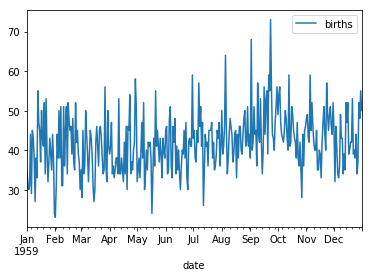

In [9]:
birth_data.plot() #almost a stationary series

In [21]:
# also called as smoothing
moving_average_birth=birth_data.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic. 

In [22]:
moving_average_birth

births
date              
1959-01-01     NaN
1959-01-02     NaN
1959-01-03     NaN
1959-01-04     NaN
1959-01-05     NaN
1959-01-06     NaN
1959-01-07     NaN
1959-01-08     NaN
1959-01-09     NaN
1959-01-10     NaN
1959-01-11     NaN
1959-01-12     NaN
1959-01-13     NaN
1959-01-14     NaN
1959-01-15     NaN
1959-01-16     NaN
1959-01-17     NaN
1959-01-18     NaN
1959-01-19     NaN
1959-01-20   39.75
1959-01-21   39.70
1959-01-22   40.75
1959-01-23   41.20
1959-01-24   41.25
1959-01-25   40.90
1959-01-26   41.60
1959-01-27   41.30
1959-01-28   40.90
1959-01-29   41.20
1959-01-30   41.75
...            ...
1959-12-02   43.80
1959-12-03   44.35
1959-12-04   44.65
1959-12-05   44.35
1959-12-06   44.05
1959-12-07   44.20
1959-12-08   44.55
1959-12-09   44.35
1959-12-10   43.95
1959-12-11   43.45
1959-12-12   43.40
1959-12-13   42.30
1959-12-14   42.45
1959-12-15   42.55
1959-12-16   42.70
1959-12-17   42.10
1959-12-18   41.80
1959-12-19   41.70
1959-12-20   41.20
1959-12-21   41.60
1959-12-22   41.95
1959-12-23   41.65
1959-12-24   41.50
1959-12-25   42.00
1959-12-26   42.05
1959-12-27   42.10
1959-12-28   42.25
1959-12-29   42.50
1959-12-30   43.10
1959-12-31   43.90

[365 rows x 1 columns]

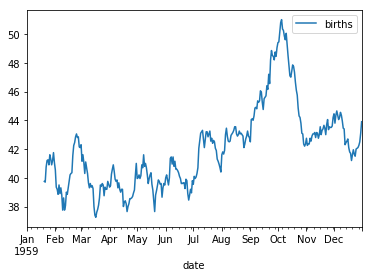

In [23]:
moving_average_birth.plot() # we can see that there is a peak in the month of october

In [25]:
sm.stats.durbin_watson(birth_data) # very less correlation

array([0.04624491])

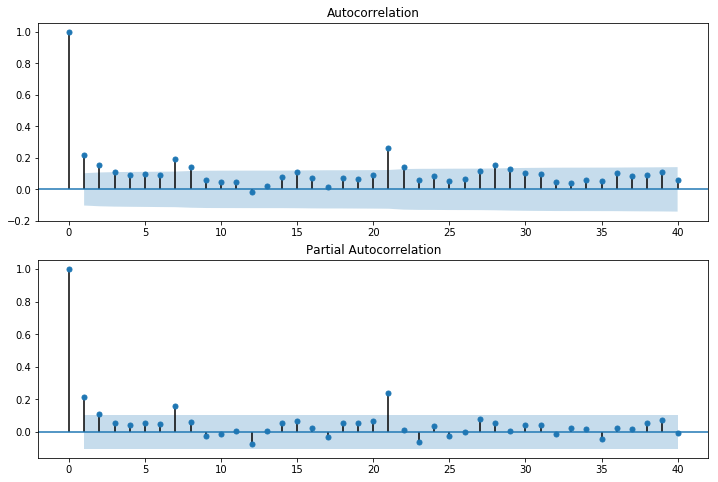

In [26]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(birth_data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(birth_data, lags=40, ax=ax2)

In [27]:
training_data=birth_data[0:320]
test_data=birth_data[320:]

In [31]:
"""
from sklearn.model_selection import train_test_split
t_x,t=train_test_split(birth_data)
""""""

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from statsmodels.tsa.

In [45]:
arima= ARIMA(training_data,order=(2,1,3))

C:\Users\virat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\virat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\virat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [46]:
model=arima.fit()

In [47]:
model.aic

2159.076974912458

In [48]:
pred= model.forecast(steps=45)[0]

In [49]:
pred

array([44.20336376, 44.64661409, 43.40243639, 43.18642407, 42.46860908,
       43.44949502, 43.80021262, 44.81159761, 44.23852903, 43.97639274,
       42.83728932, 43.04815868, 43.14699235, 44.33687764, 44.50162656,
       44.71946592, 43.69098356, 43.32064023, 42.82208716, 43.6233574 ,
       44.11878344, 44.92162375, 44.49438888, 44.08981115, 43.14260896,
       43.23608944, 43.4795044 , 44.49993718, 44.76125302, 44.83139948,
       43.94563728, 43.49084713, 43.1407838 , 43.82776885, 44.4038833 ,
       45.06229125, 44.72230914, 44.2341347 , 43.42110948, 43.44996156,
       43.78382252, 44.68646475, 44.99650633, 44.96865567, 44.17958866])

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
np.sqrt(mean_squared_error(test_data,pred))

6.419420721712673